# Prediction using unsupervised Machine Learning
Predict the optimum number of clusters from the 'iris' dataset and represent it visually

### Author: Bhumika H Yogesh

## Import the libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
sns.set()

## Import the datasets

In [16]:
# Load the iris datset
df = pd.read_csv('iris.csv')

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

In [21]:
# Check number of rows & columns
df.shape

(150, 5)

In [20]:
# Basic summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
# Check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

## Independent variable
Since we are using unsupervised machine learning algorithm, we dont need any dependent variables.

Unsupervised learning is where you only have input data (X) and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.
It can be further grouped into clustering and association problems.

Some popular examples of unsupervised learning algorithms are:

k-means for clustering problems.
Apriori algorithm for association rule learning problems.
LDA for topic modeling of text passages, i.e., discover and associate keywords to text.

In [33]:
# Extract independent variable
x = df.iloc[:, 1:4].values

## Using elbow method, find the optimum number of clusters

In [34]:
# Elbow method (wcss concept)
wcss = [] # Within Cluster Sum of Squares

for i in range(1,8):
    km = KMeans(i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [35]:
wcss

[578.6560666666668,
 105.16576351752823,
 47.955829064632695,
 34.266958907496914,
 28.48774490689197,
 24.1530816230567,
 20.65212700869822]

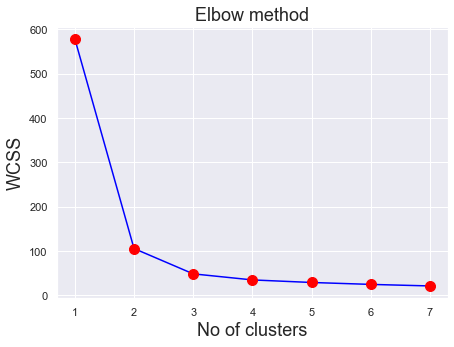

In [36]:
# Draw a plot btw number of clusters and wcss
# WCSS on Y axis ranging for different K values

plt.figure(figsize = (7,5))
plt.plot(range(1,8), wcss, mec='red', marker='o', mfc='red', ms=10, color='blue')
plt.xlabel('No of clusters', fontsize=18)
plt.ylabel('WCSS', fontsize=18)
plt.title('Elbow method', fontsize=18)
plt.show()

## Predict the optimum number of clusters from the iris dataset
In the above plot (elbow method), we can see that our elbow point is at 3. Therefore 3 is our optimum cluster. 

## Train the K - means algorithm on the training datset

In [37]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [38]:
y_pred = km.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [39]:
# Cluster centroids
km.cluster_centers_

array([[3.418     , 1.464     , 0.244     ],
       [2.75471698, 4.28113208, 1.3509434 ],
       [3.00425532, 5.6106383 , 2.04255319]])

## Visualize the Clusters

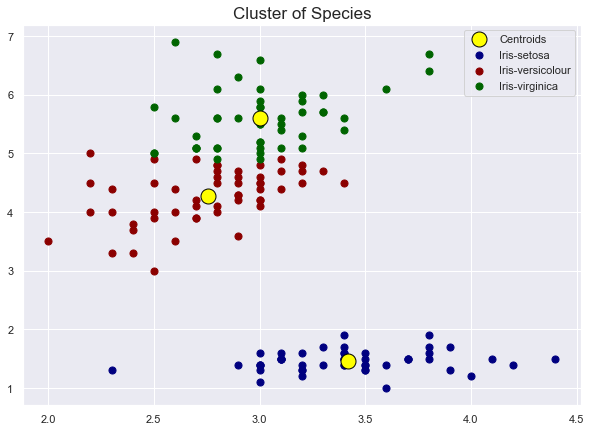

In [48]:
plt.figure(figsize = (10,7))

# Visualize Cluster - 1 with label 'Iris-setosa'
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], color="Navy", s=50, label="Iris-setosa")

# Visualize Cluster - 2 with label 'Iris-versicolour'
plt.scatter(x[y_pred==1,0], x[y_pred==1,1], color="DarkRed", s=50, label="Iris-versicolour")

# Visualize Cluster - 3 with label 'Iris-virginica'
plt.scatter(x[y_pred==2,0], x[y_pred==2,1], color="DarkGreen", s=50, label="Iris-virginica")

# Plot the centroid. With label 'Centroids'
plt.plot(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 'o', color="yellow",
         label='Centroids', markeredgecolor = 'black', ms=15)

plt.title('Cluster of Species', fontsize=17)
plt.legend()
plt.show()